## TASK -2: SUPERVISED MACHINE LEARNING

## Objective:

**In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linearregression task as it involves just two variables.** 

## Data URL: 

**https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv**

## DONE BY: 

**ROHIT SANAM VENKATA**

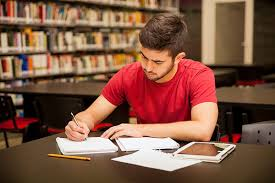

In [1]:
from IPython.display import Image
Image("/Users/rohitsanam/Downloads/download.jpeg")

## Importing the Libraries

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
%matplotlib inline 

## Reading the data

In [3]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

student = pd.read_csv(url)

## Having a look at the top five rows of the data

In [4]:
student.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Having a look at the didtribution of the data

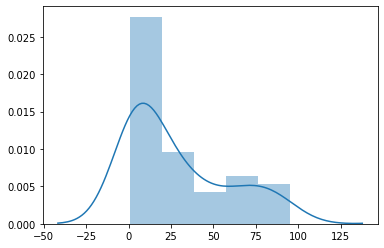

In [5]:
dist = sns.distplot(student)

- From the above plot I can say that the data is right skewed

## Having alook at the pairplot of the data

<Figure size 1080x576 with 0 Axes>

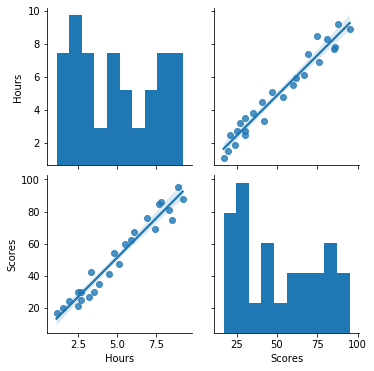

In [6]:
plt.figure(figsize=(15,8))
sns.pairplot(student,kind='reg')

## Having a look at the summary statistics

In [7]:
student.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Having a look at the columns if there are any unwanted spaces

In [8]:
student.columns

Index(['Hours', 'Scores'], dtype='object')

## Having a look at the datatypes which each column possess

In [9]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## having a look the the shape of the data

In [10]:
student.shape

(25, 2)

## having a look at the missing value 

In [11]:
student.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Getting the missing values visually 

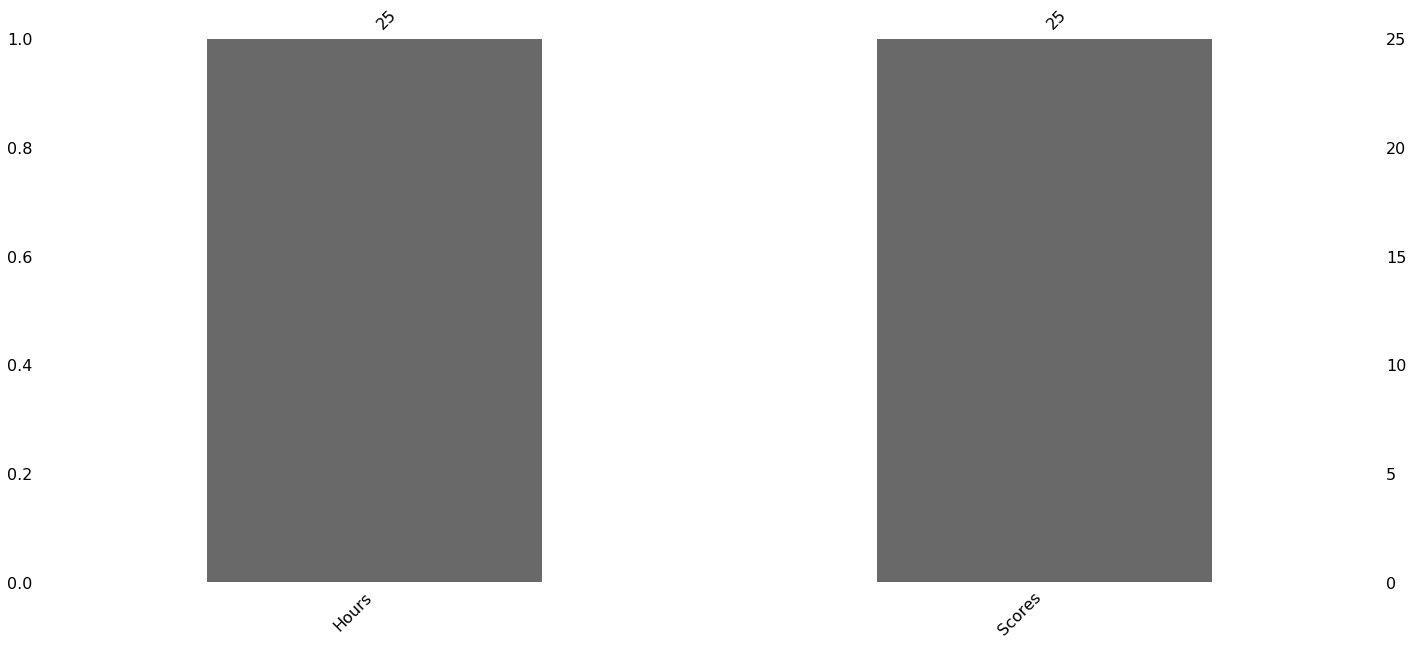

In [12]:
msno.bar(student)

## Having a look at the outliers using boxplots

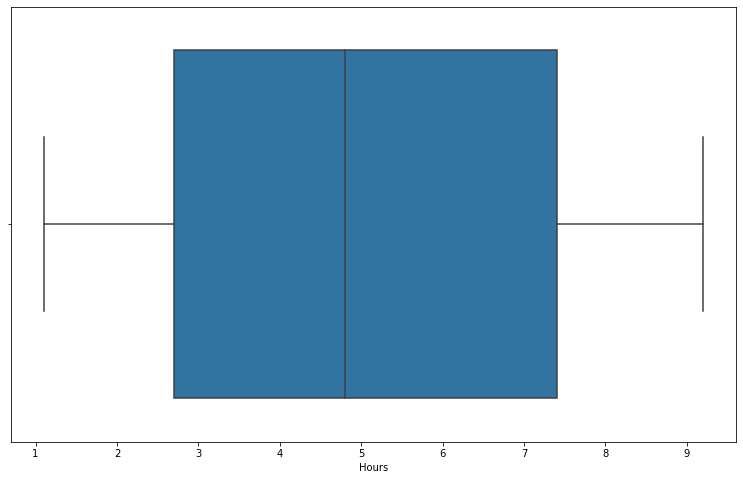

In [13]:
plt.figure(figsize=(13,8))
outlier_hours = sns.boxplot(student['Hours'])

- From the above plot there are no outliers in Hours feature

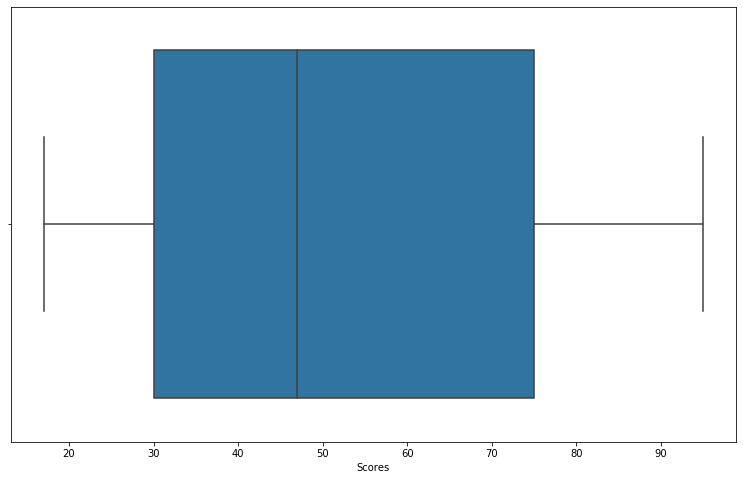

In [14]:
plt.figure(figsize=(13,8))
outlier_scores = sns.boxplot(student['Scores'])

- From the above plot there are no outliers in Scores feature

## Checking whether there is any relationship between Hours and Scores

Text(0.5, 1.0, 'Relationship between Hours studied and Marks Secured')

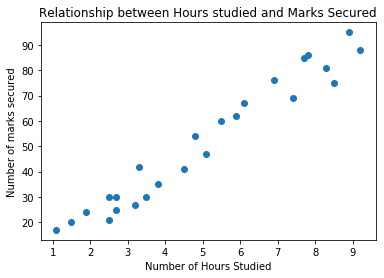

In [15]:
plt.scatter(x=student['Hours'],y=student['Scores'])
plt.xlabel('Number of Hours Studied')
plt.ylabel('Number of marks secured')
plt.title('Relationship between Hours studied and Marks Secured')

- From the above plot I can say that there is a positive correlation beteween Hours and Scores

- As there is a linear relationship between Hours Studied and Marks secured we can apply a linear Regrssion model on this

## Linear Regression

In [16]:
lr = LinearRegression()
model_lr = lr.fit(student[['Hours']],student[['Scores']])

In [17]:
r_squared = model_lr.score(student[['Hours']],student[['Scores']])

In [18]:
print("The R-squared value is:",r_squared)

The R-squared value is: 0.9529481969048356


In [19]:
intercept = model_lr.intercept_

In [20]:
print("The intercept is:",intercept)

The intercept is: [2.48367341]


In [21]:
slope = model_lr.coef_

In [22]:
print("The slope of the model is:",slope)

The slope of the model is: [[9.77580339]]


## Linear Regression Plot

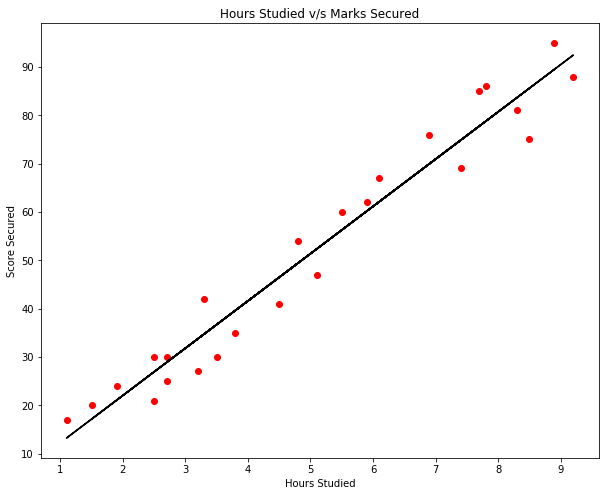

In [23]:
plt.figure(figsize=(10,8));
reg_line = slope*student[['Hours']]+intercept
plt.scatter(student[['Hours']],student[['Scores']],color='red',marker='o');
plt.plot(student.Hours,reg_line,color='black');
plt.xlabel("Hours Studied");
plt.ylabel("Score Secured");
plt.title("Hours Studied v/s Marks Secured");

## What will be predicted score if a student study for 9.25 hrs in a day?

In [24]:
lr.predict([[9.25]])

array([[92.90985477]])

- **From the above output I can sa that if a student studies for 9.25 hours his/her score will be 92.9%**